In [1]:
"""operate in parent directory"""

import os
import sys


sys.path.insert(0, os.getcwd() + "/..")

In [2]:
"""play games, with player 1 learning and player 2 making random choices"""

from tqdm import tqdm

from titans.ai import Trainer


# hard-coded parameteres
num_epochs = 10
num_games_per_epoch = 100
num_players = 10

# function to train player
def train_player() -> list[float]:
    """Train player against random strategies

    Returns
    -------
    list[float]
        win fraction for the previous 100 games
    """
    trainer = Trainer()
    win_frac = []
    for _ in tqdm(range(num_epochs)):
        win_frac.append(
            trainer.play(
                num_games=num_games_per_epoch,
                parallel=True,
                vs_random=True,
            )
        )
        trainer.train()
    return win_frac

# train up multiple players
win_frac = [
    train_player()
    for _ in range(num_players)
]

100%|██████████| 10/10 [02:27<00:00, 14.73s/it]


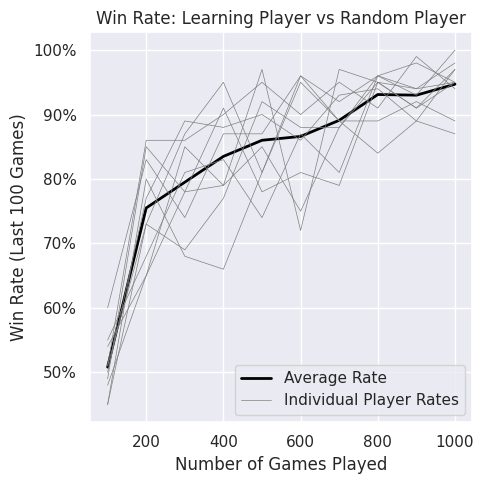

In [3]:
"""Plot results"""

from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import seaborn as sns


# compute mean scores
overall_win_frac = np.array(win_frac).mean(axis=0)

# make pretty
sns.set_theme()

# make figure
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# plot player stats
x = range(
    num_games_per_epoch,
    num_games_per_epoch * num_epochs + 1,
    num_games_per_epoch,
)
ax.plot(x, 100 * overall_win_frac, color="black", lw=2)
for y in win_frac:
    ax.plot(x, 100 * np.array(y), color="gray", lw=.5)

# label figure
ax.set_xlabel("Number of Games Played")
ax.set_ylabel(f"Win Rate (Last {num_games_per_epoch} Games)")
ax.set_title("Win Rate: Learning Player vs Random Player")
ax.yaxis.set_major_formatter(PercentFormatter())
ax.legend(["Average Rate", "Individual Player Rates"])


# show plot
fig.tight_layout()
plt.show()